Project Activity

Build a Classification Machine Learing  model using a loan dataset from kaggle.
The objective of this classification model is to predict whether a loan is to approved or not
based on the Purpose,Interest rate,Installment,Fico number of the applicant, etc amongst other information provided
in the columns of the dataset.

Step #1 Importing the required libraries

In [1]:
import pandas as pd
import numpy as np

Step#2 Loading the dataset

In [2]:
dataset = pd.read_csv('loan_data.csv')

In [3]:
dataset.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
dataset.shape

(9578, 14)

In [5]:
dataset.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
dataset.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [7]:
dataset.groupby('purpose').size()

purpose
all_other             2331
credit_card           1262
debt_consolidation    3957
educational            343
home_improvement       629
major_purchase         437
small_business         619
dtype: int64

In [8]:
dataset.columns
print(dataset.info)

<bound method DataFrame.info of       credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082

# Checking for missing Values 

In [9]:
dataset.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

# Data Visualisation

array([[<AxesSubplot:title={'center':'credit.policy'}>,
        <AxesSubplot:title={'center':'int.rate'}>,
        <AxesSubplot:title={'center':'installment'}>,
        <AxesSubplot:title={'center':'log.annual.inc'}>],
       [<AxesSubplot:title={'center':'dti'}>,
        <AxesSubplot:title={'center':'fico'}>,
        <AxesSubplot:title={'center':'days.with.cr.line'}>,
        <AxesSubplot:title={'center':'revol.bal'}>],
       [<AxesSubplot:title={'center':'revol.util'}>,
        <AxesSubplot:title={'center':'inq.last.6mths'}>,
        <AxesSubplot:title={'center':'delinq.2yrs'}>,
        <AxesSubplot:title={'center':'pub.rec'}>],
       [<AxesSubplot:title={'center':'not.fully.paid'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

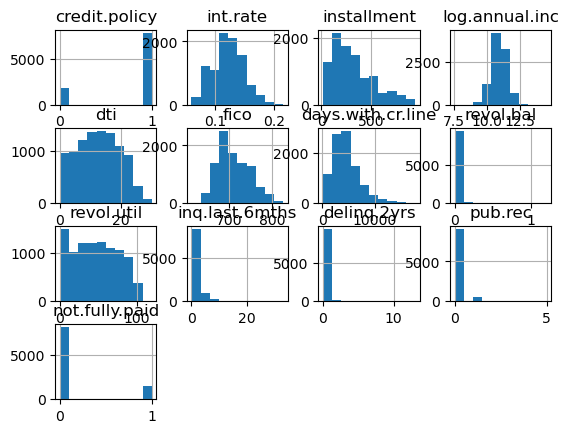

In [10]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
dataset.hist()
#plt.show()

In [11]:
#scatter_matrix(dataset)
#plt.show()

In [12]:
#Convert categorical columns to numerical
from sklearn.preprocessing import LabelEncoder
X_cat=dataset.copy()
X_cat=dataset.select_dtypes(include=['object'])
X_enc=X_cat.copy()
#ONE HOT ENCODING BLOCK
X_enc=pd.get_dummies(X_enc,columns=['purpose'])

In [13]:
dataset=dataset.drop(['purpose'],axis=1)

In [14]:
X_enc=X_enc.apply(LabelEncoder().fit_transform)

In [15]:
#dataset=dataset.drop(X_cat.columns,axis=1)

In [16]:
finalData=pd.concat([dataset,X_enc],axis=1)
finalData.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


# PERFORM DATA SEGMENTATION

In [17]:
y = finalData["credit.policy"] # TODO: Add Target name 
X = finalData.drop("credit.policy", axis=1) # TODO: Add Target name 

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# IMPORTING THE DIFFERENT TYPES OF MODELS THAT CAN BE USED

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [21]:
reg =LogisticRegression(max_iter=10)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

C:\Users\SALAKO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
print("MAE",accuracy_score(y_test,y_pred))

MAE 0.8089770354906054


In [23]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)

In [24]:
print("MAE",accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

MAE 0.988169798190675


array([[ 564,   14],
       [  20, 2276]], dtype=int64)

In [25]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

In [26]:
print("MAE",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

MAE 0.813848295059151
[[  53  525]
 [  10 2286]]
